In [2]:
import pandas as pd
import ast
from collections import Counter

df = pd.read_csv("/Users/achyuth/Desktop/w266Proj/AckermanStocks/stock.csv")
df.head()

,image_url,proxy_image_url,image_dimensions,thumbnail_url,proxy_thumbnail_url,thumbnail_dimensions,timestamp,description,url,embed_title,tweet_type,financial_info,sentiment
0,https://pbs.twimg.com/media/F-78hiZXMAAt4NV.jpg,https://images-ext-1.discordapp.net/external/r...,"(749, 1085)",https://pbs.twimg.com/profile_images/131943349...,https://images-ext-1.discordapp.net/external/h...,"(48, 48)",2023-11-15T01:06:39.739000+00:00,Currently at $2860--Documenting everything in ...,https://twitter.com/user/status/17245942794969...,<:quote_tweet:1130467736133316700> Albertrays ...,quote tweet,"[{'ticker': '$AI', 'exchanges': [], 'price': '...",Bullish
1,https://pbs.twimg.com/media/F-8MPdNXAAAu6m1.jpg,https://images-ext-1.discordapp.net/external/N...,"(653, 1199)",https://pbs.twimg.com/profile_images/164958768...,https://images-ext-1.discordapp.net/external/l...,"(48, 48)",2023-11-15T02:11:41.182000+00:00,$NET \n\nWas waiting on Cloudflare and it erup...,https://twitter.com/user/status/17246106454321...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$NET', 'exchanges': [], 'price': ...",Neutral
2,https://pbs.twimg.com/media/F-7TGF8aMAAIDdp.png,https://images-ext-1.discordapp.net/external/I...,"(1200, 591)",https://pbs.twimg.com/profile_images/150099051...,https://images-ext-1.discordapp.net/external/j...,"(48, 48)",2023-11-15T02:11:47.180000+00:00,"RT @TrendSpider: $SPY, $QQQ and $AAPL all prin...",https://twitter.com/user/status/17246108137746...,<:retweet:1130467740306657360> Theta Warrior r...,retweet,"[{'ticker': '$QQQ', 'exchanges': [], 'price': ...",Bearish
3,https://pbs.twimg.com/media/F-8RX54WEAA7Mn4.jpg,https://images-ext-1.discordapp.net/external/J...,"(1200, 653)",https://pbs.twimg.com/profile_images/150561647...,https://images-ext-1.discordapp.net/external/F...,"(48, 48)",2023-11-15T04:01:40.263000+00:00,RT @TriggerTrades: $SPX remained above 4375 th...,https://twitter.com/user/status/17246376379723...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bearish
4,https://pbs.twimg.com/media/F-8j7aHWIAA9tSn.png,https://images-ext-1.discordapp.net/external/x...,"(884, 665)",https://pbs.twimg.com/profile_images/150561647...,https://images-ext-1.discordapp.net/external/F...,"(48, 48)",2023-11-15T04:01:44.817000+00:00,RT @coiledspringcap: #SPX equal weight breakin...,https://twitter.com/user/status/17246376783927...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bullish


In [5]:
#columns to remove
cols_to_remove = [
    "image_url", 
    "proxy_image_url", 
    "image_dimensions", 
    "thumbnail_url", 
    "proxy_thumbnail_url", 
    "thumbnail_dimensions"
]

df_cleaned = df.drop(columns=cols_to_remove)

df_cleaned.head()

,timestamp,description,url,embed_title,tweet_type,financial_info,sentiment
0,2023-11-15T01:06:39.739000+00:00,Currently at $2860--Documenting everything in ...,https://twitter.com/user/status/17245942794969...,<:quote_tweet:1130467736133316700> Albertrays ...,quote tweet,"[{'ticker': '$AI', 'exchanges': [], 'price': '...",Bullish
1,2023-11-15T02:11:41.182000+00:00,$NET \n\nWas waiting on Cloudflare and it erup...,https://twitter.com/user/status/17246106454321...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$NET', 'exchanges': [], 'price': ...",Neutral
2,2023-11-15T02:11:47.180000+00:00,"RT @TrendSpider: $SPY, $QQQ and $AAPL all prin...",https://twitter.com/user/status/17246108137746...,<:retweet:1130467740306657360> Theta Warrior r...,retweet,"[{'ticker': '$QQQ', 'exchanges': [], 'price': ...",Bearish
3,2023-11-15T04:01:40.263000+00:00,RT @TriggerTrades: $SPX remained above 4375 th...,https://twitter.com/user/status/17246376379723...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bearish
4,2023-11-15T04:01:44.817000+00:00,RT @coiledspringcap: #SPX equal weight breakin...,https://twitter.com/user/status/17246376783927...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bullish


In [6]:
df_cleaned.to_csv("cleaned_stock.csv", index=False)
print("Cleaned CSV saved as 'cleaned_stock.csv'.")

Cleaned CSV saved as 'cleaned_stock.csv'.


In [7]:
df = pd.read_csv("cleaned_stock.csv")
df.head()

,timestamp,description,url,embed_title,tweet_type,financial_info,sentiment
0,2023-11-15T01:06:39.739000+00:00,Currently at $2860--Documenting everything in ...,https://twitter.com/user/status/17245942794969...,<:quote_tweet:1130467736133316700> Albertrays ...,quote tweet,"[{'ticker': '$AI', 'exchanges': [], 'price': '...",Bullish
1,2023-11-15T02:11:41.182000+00:00,$NET \n\nWas waiting on Cloudflare and it erup...,https://twitter.com/user/status/17246106454321...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$NET', 'exchanges': [], 'price': ...",Neutral
2,2023-11-15T02:11:47.180000+00:00,"RT @TrendSpider: $SPY, $QQQ and $AAPL all prin...",https://twitter.com/user/status/17246108137746...,<:retweet:1130467740306657360> Theta Warrior r...,retweet,"[{'ticker': '$QQQ', 'exchanges': [], 'price': ...",Bearish
3,2023-11-15T04:01:40.263000+00:00,RT @TriggerTrades: $SPX remained above 4375 th...,https://twitter.com/user/status/17246376379723...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bearish
4,2023-11-15T04:01:44.817000+00:00,RT @coiledspringcap: #SPX equal weight breakin...,https://twitter.com/user/status/17246376783927...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bullish


In [8]:
#extract tickers from the financial_info string
def extract_tickers(financial_info):
    tickers = []
    try:
        data = ast.literal_eval(financial_info)
        if isinstance(data, list):
            for item in data:
                if isinstance(item, dict) and 'ticker' in item:
                    tickers.append(item['ticker'])
    except Exception as e:
        print(f"Error parsing: {financial_info}, Error: {e}")
    return tickers

df['tickers_list'] = df['financial_info'].apply(extract_tickers)
df.head()


,timestamp,description,url,embed_title,tweet_type,financial_info,sentiment,tickers_list
0,2023-11-15T01:06:39.739000+00:00,Currently at $2860--Documenting everything in ...,https://twitter.com/user/status/17245942794969...,<:quote_tweet:1130467736133316700> Albertrays ...,quote tweet,"[{'ticker': '$AI', 'exchanges': [], 'price': '...",Bullish,[$AI]
1,2023-11-15T02:11:41.182000+00:00,$NET \n\nWas waiting on Cloudflare and it erup...,https://twitter.com/user/status/17246106454321...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$NET', 'exchanges': [], 'price': ...",Neutral,[$NET]
2,2023-11-15T02:11:47.180000+00:00,"RT @TrendSpider: $SPY, $QQQ and $AAPL all prin...",https://twitter.com/user/status/17246108137746...,<:retweet:1130467740306657360> Theta Warrior r...,retweet,"[{'ticker': '$QQQ', 'exchanges': [], 'price': ...",Bearish,"[$QQQ, $AAPL, $SPY]"
3,2023-11-15T04:01:40.263000+00:00,RT @TriggerTrades: $SPX remained above 4375 th...,https://twitter.com/user/status/17246376379723...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bearish,[$SPX]
4,2023-11-15T04:01:44.817000+00:00,RT @coiledspringcap: #SPX equal weight breakin...,https://twitter.com/user/status/17246376783927...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bullish,[$SPX]


In [9]:
all_tickers = [ticker for sublist in df['tickers_list'] for ticker in sublist]

ticker_counts = Counter(all_tickers)

sorted_ticker_counts = sorted(ticker_counts.items(), key=lambda x: x[1], reverse=True)

for ticker, count in sorted_ticker_counts:
    print(f"{ticker}: {count}")


$SPY: 3267
$TSLA: 1571
$SPX: 1356
$QQQ: 1309
$ES=F: 1156
$AAPL: 1126
$NVDA: 1117
$DXY: 984
$AMZN: 686
$COIN: 672
$AMD: 626
$IWM: 585
$MSFT: 579
$^SPX: 432
$FF: 418
$NFLX: 317
$HOOD: 286
$BTC: 283
$GME: 276
$NDX: 274
$META: 266
$XLK: 254
$NQ=F: 247
$SHOP: 242
$DIA: 239
$GOLD: 232
$GOOGL: 228
$BA: 218
$BABA: 205
$TLT: 202
$XLF: 197
$PYPL: 192
$SNAP: 187
$ROKU: 187
$PLTR: 181
$ES: 168
$ARKK: 155
$CHWY: 152
$VIX: 150
$SNOW: 149
$SQ: 143
$MARA: 143
$KRE: 141
$RBLX: 141
$AMC: 139
$NIO: 139
$GOOG: 137
$FB: 136
$TSM: 131
$COST: 126
$DIS: 124
$QCOM: 123
$GLD: 121
$SBUX: 119
$OXY: 119
$PFE: 117
$F: 115
$HD: 112
$MU: 111
$RIOT: 108
$INTC: 107
$SOFI: 106
$CAT: 105
$WMT: 103
$TGT: 102
$RTY_F: 100
$TWTR: 100
$TIVC: 98
$AI: 97
$CVNA: 97
$CRWD: 96
$XOM: 95
$JPM: 95
$MRNA: 95
$DKNG: 94
$SLV: 93
$LCID: 93
$USD: 92
$MSTR: 91
$RIVN: 90
$CS: 87
$SBNY: 86
$SMCI: 81
$RUT: 80
$AFRM: 80
$CRM: 79
$AVGO: 79
$ENPH: 79
$TLRY: 78
$CPI: 78
$SMH: 77
$MCD: 77
$UBER: 76
$FOMC: 76
$XLE: 75
$LYFT: 75
$SVIB: 74
$NET: 73
$

In [10]:
def parse_financial_info(s):
    """
    Parse a string representation of a list/dict from the financial_info column.
    If it's a list with items, returns the first dictionary.
    Otherwise, returns an empty dictionary.
    """
    try:
        if pd.isnull(s) or s.strip() == '':
            return {}
        parsed = ast.literal_eval(s)
        if isinstance(parsed, list) and len(parsed) > 0:
            return parsed[0] if isinstance(parsed[0], dict) else {}
        elif isinstance(parsed, dict):
            return parsed
        else:
            return {}
    except Exception as e:
        return {}

financial_info_parsed = df['financial_info'].apply(parse_financial_info)

financial_info_df = pd.json_normalize(financial_info_parsed)

df_expanded = pd.concat([df, financial_info_df], axis=1)
df_expanded.head()


,timestamp,description,url,embed_title,tweet_type,financial_info,sentiment,tickers_list,ticker,exchanges,price,percentage_change,4h_ta_result,4h_ta_details,1d_ta_result,1d_ta_details
0,2023-11-15T01:06:39.739000+00:00,Currently at $2860--Documenting everything in ...,https://twitter.com/user/status/17245942794969...,<:quote_tweet:1130467736133316700> Albertrays ...,quote tweet,"[{'ticker': '$AI', 'exchanges': [], 'price': '...",Bullish,[$AI],$AI,[],29.63,+6.85%,BUY,"14 buy, 8 hold, 4 sell",STRONG_BUY,"16 buy, 9 hold, 1 sell"
1,2023-11-15T02:11:41.182000+00:00,$NET \n\nWas waiting on Cloudflare and it erup...,https://twitter.com/user/status/17246106454321...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$NET', 'exchanges': [], 'price': ...",Neutral,[$NET],$NET,[],70.61,+9.52%,STRONG_BUY,"16 buy, 9 hold, 1 sell",STRONG_BUY,"17 buy, 9 hold, 0 sell"
2,2023-11-15T02:11:47.180000+00:00,"RT @TrendSpider: $SPY, $QQQ and $AAPL all prin...",https://twitter.com/user/status/17246108137746...,<:retweet:1130467740306657360> Theta Warrior r...,retweet,"[{'ticker': '$QQQ', 'exchanges': [], 'price': ...",Bearish,"[$QQQ, $AAPL, $SPY]",$QQQ,[],385.33,+2.11%,BUY,"17 buy, 6 hold, 3 sell",STRONG_BUY,"17 buy, 9 hold, 0 sell"
3,2023-11-15T04:01:40.263000+00:00,RT @TriggerTrades: $SPX remained above 4375 th...,https://twitter.com/user/status/17246376379723...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bearish,[$SPX],$SPX,[],4495.71,+1.87%,NaN,NaN,NaN,NaN
4,2023-11-15T04:01:44.817000+00:00,RT @coiledspringcap: #SPX equal weight breakin...,https://twitter.com/user/status/17246376783927...,<:retweet:1130467740306657360> ReciKnows retwe...,retweet,"[{'ticker': '$SPX', 'exchanges': [], 'price': ...",Bullish,[$SPX],$SPX,[],4495.71,+1.87%,NaN,NaN,NaN,NaN


In [11]:
df_expanded.to_csv("expanded_stock.csv", index=False)
print("Expanded CSV saved as 'expanded_stock.csv'.")

Expanded CSV saved as 'expanded_stock.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 8)

input_csv = 'expanded_stock.csv'
output_csv = 'filtered_5_companies.csv'

In [3]:
target_tickers = ['$AAPL', '$MSFT', '$AMD', '$NVDA', '$AMZN']

In [4]:
df = pd.read_csv(input_csv, parse_dates=['timestamp'])
print("Original dataset shape:", df.shape)

Original dataset shape: (28172, 16)


In [ ]:
print("\nSample of the original data:")
print(df.head())


Sample of the original data:
                          timestamp  \
0  2023-11-15T01:06:39.739000+00:00   
1  2023-11-15T02:11:41.182000+00:00   
2  2023-11-15T02:11:47.180000+00:00   
3  2023-11-15T04:01:40.263000+00:00   
4  2023-11-15T04:01:44.817000+00:00   

                                         description  \
0  Currently at $2860--Documenting everything in ...   
1  $NET \n\nWas waiting on Cloudflare and it erup...   
2  RT @TrendSpider: $SPY, $QQQ and $AAPL all prin...   
3  RT @TriggerTrades: $SPX remained above 4375 th...   
4  RT @coiledspringcap: #SPX equal weight breakin...   

                                                 url  \
0  https://twitter.com/user/status/17245942794969...   
1  https://twitter.com/user/status/17246106454321...   
2  https://twitter.com/user/status/17246108137746...   
3  https://twitter.com/user/status/17246376379723...   
4  https://twitter.com/user/status/17246376783927...   

                                         embed_title   tweet_

In [6]:
print("\nData types in the dataset:")
print(df.dtypes)


Data types in the dataset:
timestamp             object
description           object
url                   object
embed_title           object
tweet_type            object
financial_info        object
sentiment             object
tickers_list          object
ticker                object
exchanges             object
price                float64
percentage_change     object
4h_ta_result          object
4h_ta_details         object
1d_ta_result          object
1d_ta_details         object
dtype: object


In [7]:
df.columns = df.columns.str.strip()

In [8]:
df_filtered = df[df['ticker'].isin(target_tickers)].copy()

In [9]:
print("\nFiltered dataset shape (only target companies):", df_filtered.shape)


Filtered dataset shape (only target companies): (2914, 16)


In [10]:
df_filtered.to_csv(output_csv, index=False)
print(f"\nFiltered dataset saved to {output_csv}")


Filtered dataset saved to filtered_5_companies.csv


# Start from here

In [8]:
import pandas as pd
import ast
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
df_filtered = pd.read_csv('filtered_5_companies.csv')

In [10]:
# missing_sentiment_rows = df_filtered[df_filtered['sentiment'].isnull()]

# print("Rows with missing sentiment (excluding the sentiment column):")
# x = missing_sentiment_rows.drop(columns=['sentiment']).head()
# x.head()


In [11]:
# # If you want to see all rows with missing sentiment, uncomment the next line:
# x = missing_sentiment_rows.drop(columns=['sentiment'])
# x.head()

In [12]:
# key_columns = ['timestamp', 'ticker', 'price', 'percentage_change', 'sentiment']
# print("\nMissing values per key column:")
# print(df_filtered[key_columns].isnull().sum())

In [13]:
df_filtered['price'] = pd.to_numeric(df_filtered['price'], errors='coerce')
df_filtered['percentage_change'] = df_filtered['percentage_change'].replace({'%': ''}, regex=True)
df_filtered['percentage_change'] = pd.to_numeric(df_filtered['percentage_change'], errors='coerce')

In [14]:
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce')

In [15]:
desc_stats = df_filtered.groupby('ticker').agg({
    'timestamp': 'count',   # tweet count
    'price': ['mean', 'median', 'std', 'min', 'max'],
    'percentage_change': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

desc_stats.columns = ['ticker', 'tweet_count', 'price_mean', 'price_median', 'price_std', 'price_min', 'price_max',
                        'pct_change_mean', 'pct_change_median', 'pct_change_std', 'pct_change_min', 'pct_change_max']
print("\nDescriptive Statistics by Company:")
print(desc_stats)


Descriptive Statistics by Company:
  ticker  tweet_count   price_mean  price_median    price_std  price_min  \
0  $AAPL          611   167.988736      166.7250    23.098283    124.465   
1   $AMD          304   119.257850      116.7700    30.068718     59.360   
2  $AMZN          333  1038.003069      183.6611  1306.708966     83.790   
3  $MSFT          246   315.374124      304.2200    63.485489    215.860   
4  $NVDA          745   349.959067      223.5000   301.699719    100.115   

   price_max  pct_change_mean  pct_change_median  pct_change_std  \
0     236.42         0.249580              0.020        1.872814   
1     181.55         0.967390              0.320        3.223931   
2    3409.08         0.335889              0.010        2.984052   
3     468.33         0.214224              0.015        1.806011   
4    1240.78        -0.059873             -0.000        3.452105   

   pct_change_min  pct_change_max  
0           -5.42            6.57  
1          -12.51         

In [16]:
df_filtered['sentiment'] = df_filtered['sentiment'].str.strip().str.upper()

In [17]:
sentiment_counts = df_filtered.pivot_table(index='ticker', columns='sentiment', values='timestamp', aggfunc='count', fill_value=0)
print("\nSentiment Distribution per Company:")
print(sentiment_counts)


Sentiment Distribution per Company:
sentiment  BEARISH  BEARISH (100.0%)  BEARISH (36.05%)  BEARISH (40.36%)  \
ticker                                                                     
$AAPL          123                 1                 0                 0   
$AMD            26                 0                 0                 0   
$AMZN           29                 0                 0                 0   
$MSFT           36                 0                 0                 0   
$NVDA           81                 0                 0                 0   

sentiment  BEARISH (40.43%)  BEARISH (40.58%)  BEARISH (40.92%)  \
ticker                                                            
$AAPL                     0                 0                 0   
$AMD                      0                 0                 0   
$AMZN                     0                 0                 0   
$MSFT                     0                 0                 0   
$NVDA                     0 

In [18]:
def clean_sentiment(s):
    if isinstance(s, str):
        s = s.strip().lower()
        if "bullish" in s:
            return "BULLISH"
        elif "bearish" in s:
            return "BEARISH"
        elif "neutral" in s:
            return "NEUTRAL"
    return s

In [19]:
df_filtered['sentiment_clean'] = df_filtered['sentiment'].apply(clean_sentiment)

print("Unique sentiment values:", df_filtered['sentiment_clean'].unique())

Unique sentiment values: ['BEARISH' 'NEUTRAL' 'BULLISH' nan]


In [20]:
sentiment_counts = df_filtered.groupby(['ticker', 'sentiment_clean']).size().reset_index(name='count')

sentiment_pivot = sentiment_counts.pivot(index='ticker', columns='sentiment_clean', values='count').fillna(0)
print(sentiment_pivot)

sentiment_clean  BEARISH  BULLISH  NEUTRAL
ticker                                    
$AAPL                162      428       89
$AMD                  45      212       88
$AMZN                 53      204       74
$MSFT                 49      158       87
$NVDA                 93      287       95


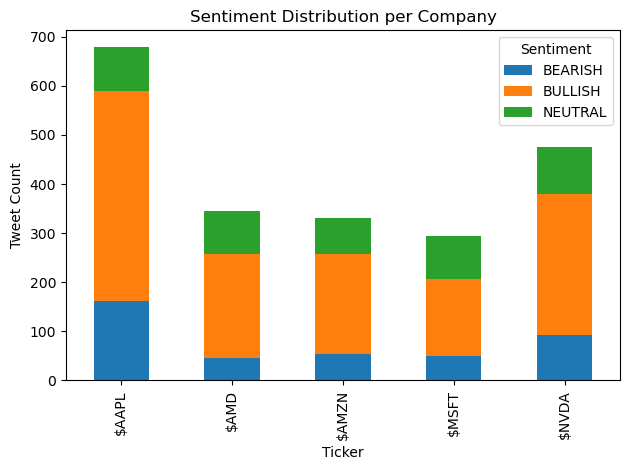

In [21]:
sentiment_pivot.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution per Company')
plt.xlabel('Ticker')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [22]:
df_filtered['date'] = df_filtered['timestamp'].dt.date

In [23]:
daily_tweets = df_filtered.groupby(['date', 'ticker']).size().reset_index(name='tweet_count')
print("\nDaily tweet counts sample:")
print(daily_tweets.head())


Daily tweet counts sample:
         date ticker  tweet_count
0  2021-12-27   $AMD            1
1  2021-12-27  $MSFT            1
2  2021-12-27  $NVDA            1
3  2022-01-02  $AAPL            1
4  2022-01-02   $AMD            1


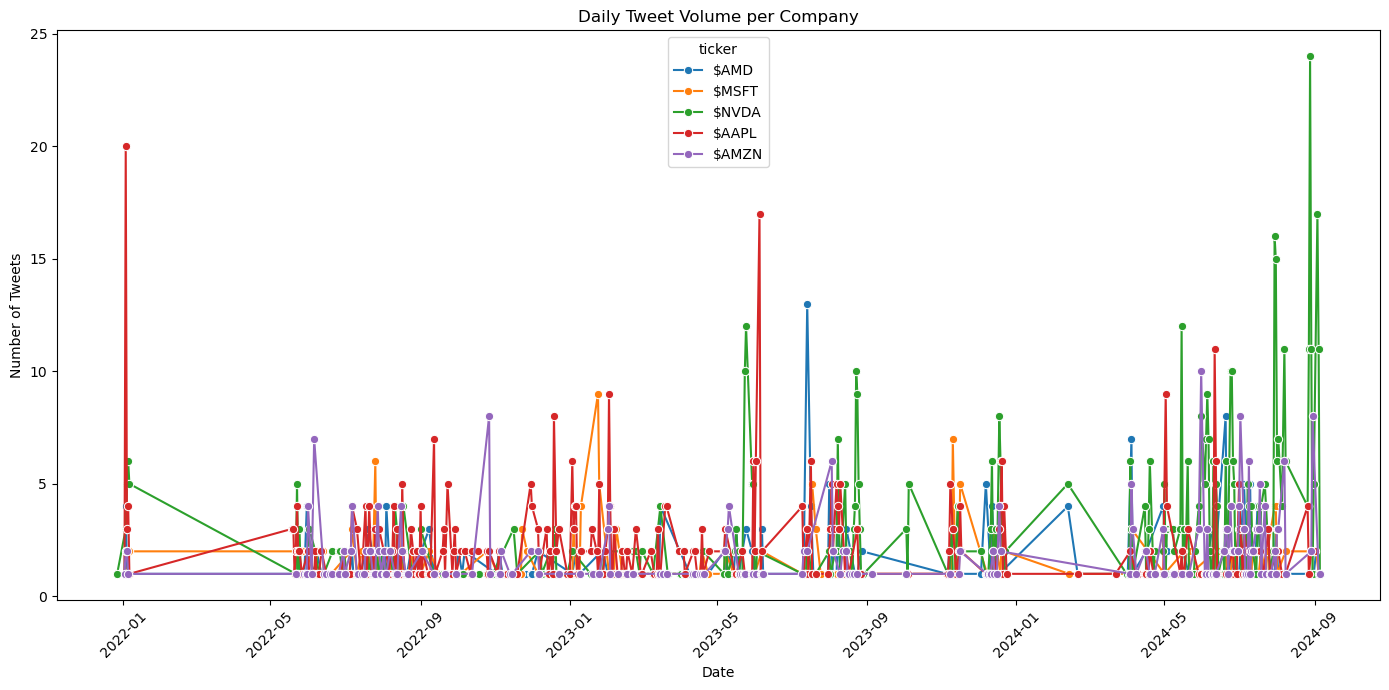

In [24]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_tweets, x='date', y='tweet_count', hue='ticker', marker='o')
plt.title('Daily Tweet Volume per Company')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


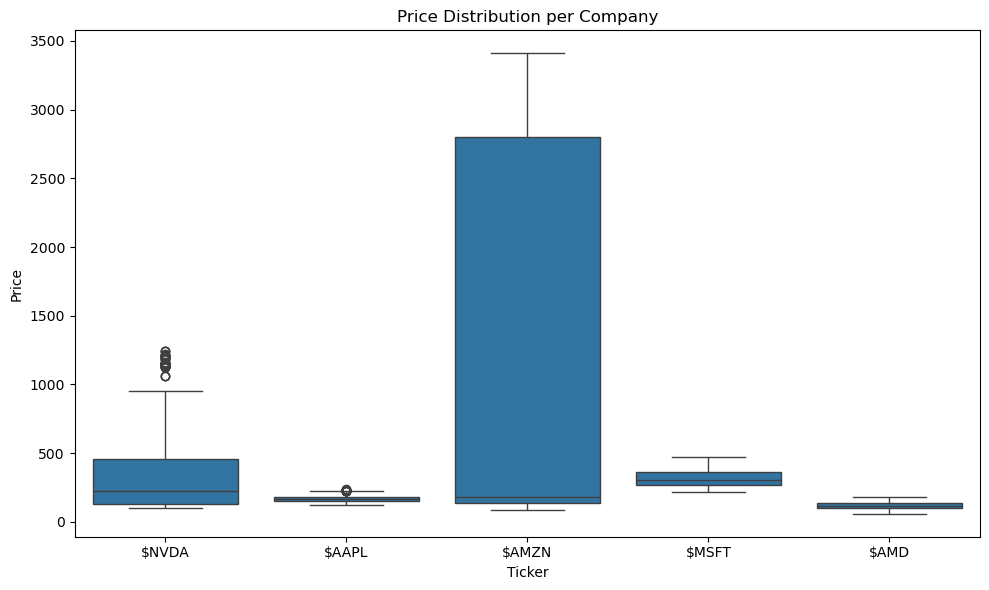

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ticker', y='price', data=df_filtered)
plt.title('Price Distribution per Company')
plt.xlabel('Ticker')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

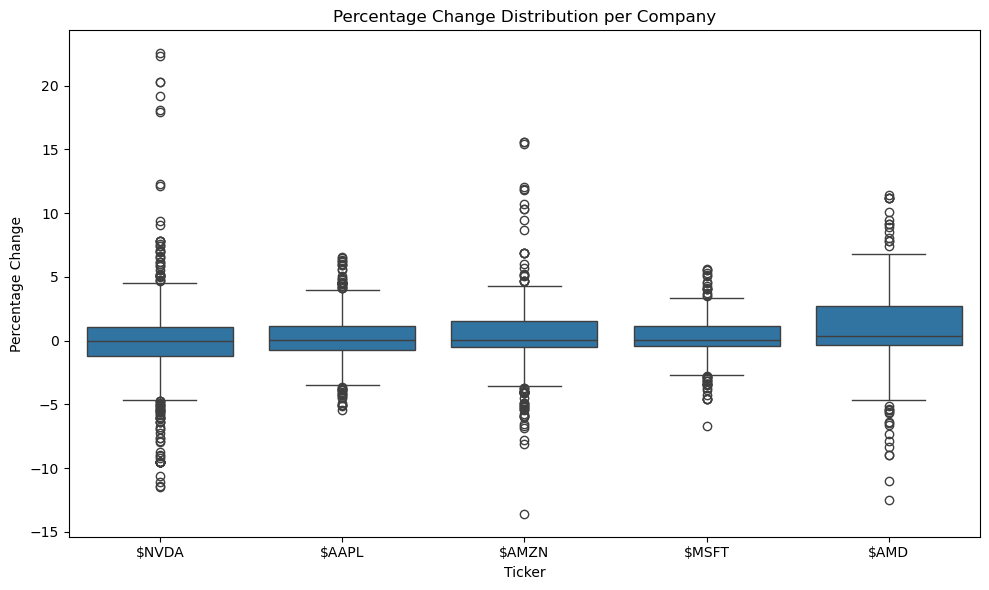

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ticker', y='percentage_change', data=df_filtered)
plt.title('Percentage Change Distribution per Company')
plt.xlabel('Ticker')
plt.ylabel('Percentage Change')
plt.tight_layout()
plt.show()

In [27]:
# for ticker in target_tickers:
#     subset = df_filtered[df_filtered['ticker'] == ticker][['price', 'percentage_change']]
#     correlation = subset.corr().iloc[0, 1]
#     print(f"Correlation between price and percentage change for {ticker}: {correlation:.2f}")
    
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(data=subset, x='price', y='percentage_change')
#     plt.title(f'{ticker}: Price vs. Percentage Change (Correlation: {correlation:.2f})')
#     plt.xlabel('Price')
#     plt.ylabel('Percentage Change')
#     plt.tight_layout()
#     plt.show()


Distribution for 4h_ta_result:
   ticker 4h_ta_result  count
0   $AAPL          BUY    286
1   $AAPL      NEUTRAL     54
2   $AAPL         SELL    199
3   $AAPL   STRONG_BUY     97
4   $AAPL  STRONG_SELL     50
5    $AMD          BUY    158
6    $AMD      NEUTRAL     27
7    $AMD         SELL     99
8    $AMD   STRONG_BUY     57
9    $AMD  STRONG_SELL     33
10  $AMZN          BUY    149
11  $AMZN      NEUTRAL     35
12  $AMZN         SELL    125
13  $AMZN   STRONG_BUY     55
14  $AMZN  STRONG_SELL     20
15  $MSFT          BUY    118
16  $MSFT      NEUTRAL     23
17  $MSFT         SELL     70
18  $MSFT   STRONG_BUY     35
19  $MSFT  STRONG_SELL     33
20  $NVDA          BUY    337
21  $NVDA      NEUTRAL     88
22  $NVDA         SELL    232
23  $NVDA   STRONG_BUY    109
24  $NVDA  STRONG_SELL     49


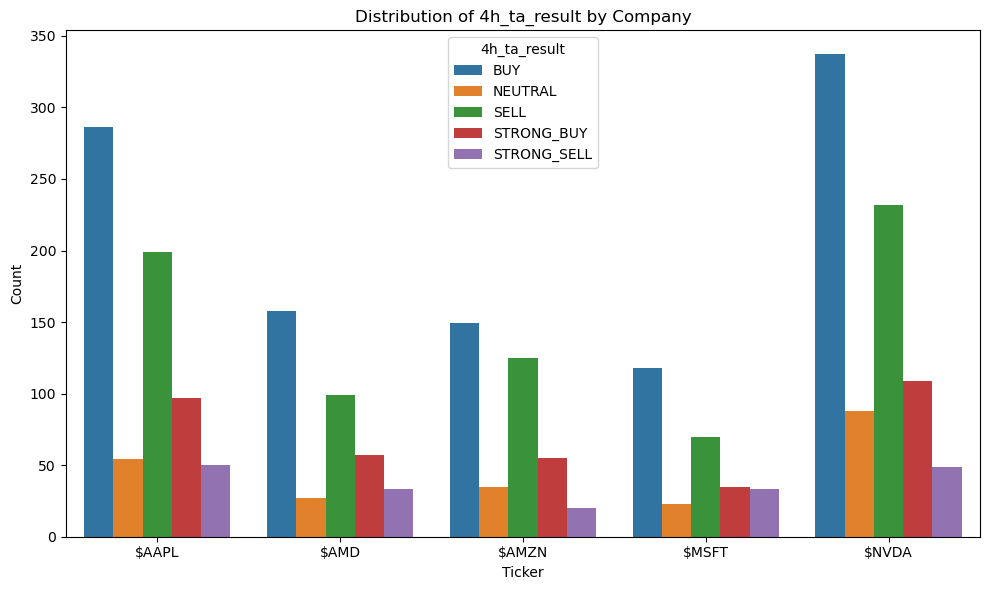


Distribution for 1d_ta_result:
   ticker 1d_ta_result  count
0   $AAPL          BUY    175
1   $AAPL      NEUTRAL     38
2   $AAPL         SELL     94
3   $AAPL   STRONG_BUY     99
4   $AAPL  STRONG_SELL     46
5    $AMD          BUY     76
6    $AMD      NEUTRAL     30
7    $AMD         SELL     53
8    $AMD   STRONG_BUY     64
9    $AMD  STRONG_SELL     14
10  $AMZN          BUY    107
11  $AMZN      NEUTRAL     24
12  $AMZN         SELL     65
13  $AMZN   STRONG_BUY     47
14  $AMZN  STRONG_SELL     15
15  $MSFT          BUY     78
16  $MSFT      NEUTRAL     14
17  $MSFT         SELL     39
18  $MSFT   STRONG_BUY     41
19  $MSFT  STRONG_SELL      8
20  $NVDA          BUY    317
21  $NVDA      NEUTRAL     72
22  $NVDA         SELL    140
23  $NVDA   STRONG_BUY    126


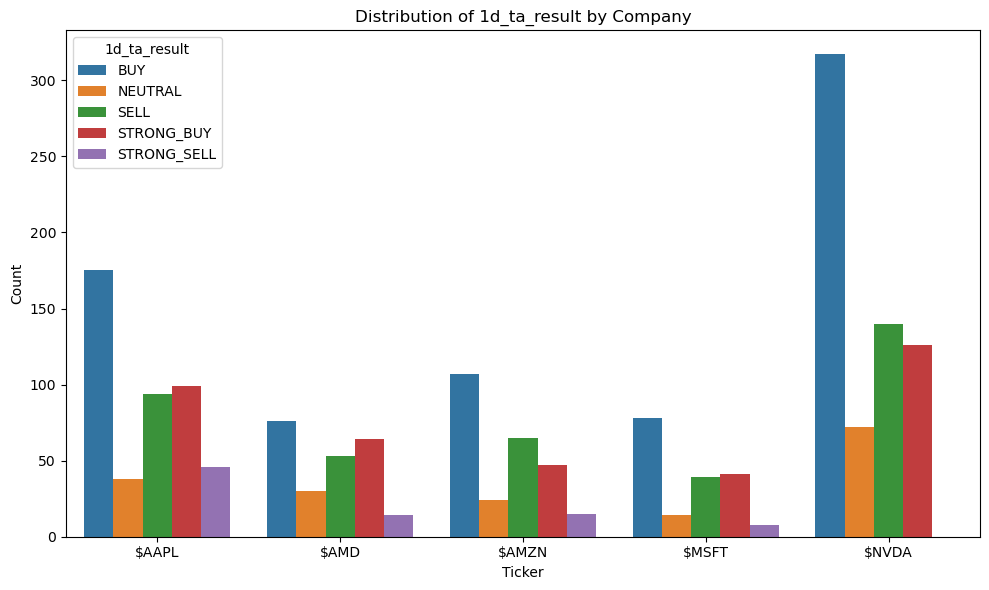

In [28]:
ta_columns = ['4h_ta_result', '1d_ta_result']

for col in ta_columns:
    if col in df_filtered.columns:
        ta_counts = df_filtered.groupby(['ticker', col]).size().reset_index(name='count')
        print(f"\nDistribution for {col}:")
        print(ta_counts)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='ticker', y='count', hue=col, data=ta_counts)
        plt.title(f'Distribution of {col} by Company')
        plt.xlabel('Ticker')
        plt.ylabel('Count')
        plt.legend(title=col)
        plt.tight_layout()
        plt.show()



Average Percentage Change by Cleaned Sentiment and Company:
   ticker sentiment_clean  percentage_change
0   $AAPL         BEARISH           0.020494
1   $AAPL         BULLISH           0.307617
2   $AAPL         NEUTRAL           0.215618
3    $AMD         BEARISH           0.651556
4    $AMD         BULLISH           1.404906
5    $AMD         NEUTRAL           1.254483
6   $AMZN         BEARISH          -0.623462
7   $AMZN         BULLISH           0.649388
8   $AMZN         NEUTRAL           0.550845
9   $MSFT         BEARISH           0.069592
10  $MSFT         BULLISH           0.260127
11  $MSFT         NEUTRAL           0.240000
12  $NVDA         BEARISH          -0.084301
13  $NVDA         BULLISH           0.618287
14  $NVDA         NEUTRAL           0.881263


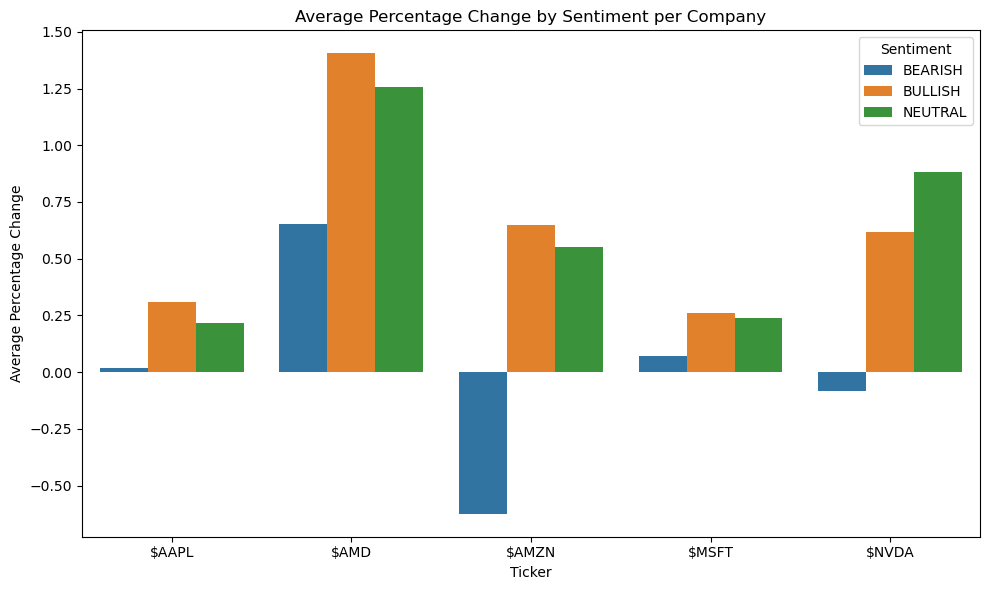

In [29]:
# Calculate average percentage change by cleaned sentiment and company
sentiment_price_clean = df_filtered.groupby(['ticker', 'sentiment_clean'])['percentage_change'].mean().reset_index()
print("\nAverage Percentage Change by Cleaned Sentiment and Company:")
print(sentiment_price_clean)

plt.figure(figsize=(10, 6))
sns.barplot(x='ticker', y='percentage_change', hue='sentiment_clean', data=sentiment_price_clean)
plt.title('Average Percentage Change by Sentiment per Company')
plt.xlabel('Ticker')
plt.ylabel('Average Percentage Change')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [30]:
daily_tweets.to_csv('daily_tweet_volume_by_company.csv', index=False)
print("\nDaily tweet volume data saved to 'daily_tweet_volume_by_company.csv'.")



Daily tweet volume data saved to 'daily_tweet_volume_by_company.csv'.


# Modeling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [64]:
df_filtered = pd.read_csv('filtered_5_companies.csv', parse_dates=['timestamp'])

In [65]:
def clean_sentiment(s):
    if isinstance(s, str):
        s = s.strip().lower()
        if "bullish" in s:
            return "BULLISH"
        elif "bearish" in s:
            return "BEARISH"
        elif "neutral" in s:
            return "NEUTRAL"
    return None

In [66]:
if 'sentiment_clean' not in df_filtered.columns:
    df_filtered['sentiment_clean'] = df_filtered['sentiment'].apply(clean_sentiment)

In [67]:
sentiment_mapping = {'BULLISH': 1, 'NEUTRAL': 0, 'BEARISH': -1}

In [68]:
target_tickers = ['$AAPL', '$MSFT', '$AMD', '$NVDA', '$AMZN']

In [69]:
window_size = 10

all_X = []
all_y = []

In [70]:
def create_sequences(dataset, window_size=10):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i+window_size, :])
        y.append(dataset[i+window_size, 0])  # target: next price value (first column)
    return np.array(X), np.array(y)

for ticker in target_tickers:
    df_ticker = df_filtered[df_filtered['ticker'] == ticker].copy()
    if df_ticker.empty:
        print(f"No data found for {ticker}")
        continue

    df_ticker.sort_values('timestamp', inplace=True)
    
    df_ticker['sentiment_score'] = df_ticker['sentiment_clean'].map(sentiment_mapping)
    
    df_ticker = df_ticker.dropna(subset=['price', 'sentiment_score'])
    
    # Ensure 'price' is numeric
    df_ticker['price'] = pd.to_numeric(df_ticker['price'], errors='coerce')
    df_ticker = df_ticker.dropna(subset=['price'])
    
    # Select features: price and sentiment_score
    data = df_ticker[['price', 'sentiment_score']].copy()
    print(f"\n{ticker} data sample:")
    print(data.head())
    print(data.describe())
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values)
    
    # Debug: Check for NaNs in the scaled data
    if np.isnan(scaled_data).any():
        print(f"NaN values found in scaled_data for {ticker}: {np.isnan(scaled_data).sum()}")
        continue  # Skip this ticker if issues are found

    # Create sequences
    if len(scaled_data) <= window_size:
        print(f"Not enough data for {ticker} to create sequences with window_size={window_size}")
        continue

    X_ticker, y_ticker = create_sequences(scaled_data, window_size)
    print(f"{ticker}: X shape: {X_ticker.shape}, y shape: {y_ticker.shape}")
    
    all_X.append(X_ticker)
    all_y.append(y_ticker)


$AAPL data sample:
       price  sentiment_score
2041  177.60              1.0
2039  177.60              1.0
2913  180.14              1.0
2034  181.16              1.0
2033  181.50              1.0
            price  sentiment_score
count  679.000000       679.000000
mean   162.419948         0.391753
std     17.804583         0.846469
min    124.465000        -1.000000
25%    149.480000         0.000000
50%    162.720000         1.000000
75%    176.280000         1.000000
max    198.150000         1.000000
$AAPL: X shape: (669, 10, 2), y shape: (669,)

$MSFT data sample:
       price  sentiment_score
2043  341.52              1.0
2030  333.36              1.0
2020  328.13              1.0
2012  325.75              1.0
1472  268.51              1.0
            price  sentiment_score
count  293.000000       293.000000
mean   294.454795         0.368601
std     41.748063         0.754419
min    215.860000        -1.000000
25%    263.700000         0.000000
50%    291.060000         1.0

In [71]:
if not all_X:
    raise ValueError("No sequences generated. Check your data and parameters.")

In [72]:
X_combined = np.concatenate(all_X, axis=0)
y_combined = np.concatenate(all_y, axis=0)
print("Combined X shape:", X_combined.shape)
print("Combined y shape:", y_combined.shape)

Combined X shape: (2059, 10, 2)
Combined y shape: (2059,)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, shuffle=True
)

In [76]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1647, 10, 2)
y_train shape: (1647,)
X_test shape: (412, 10, 2)
y_test shape: (412,)


In [77]:
# Build the LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/opt/homebrew/Caskroom/miniconda/base/envs/py39/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 64)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,601 (115.63 KB)

 Trainable params: 29,601 (115.63 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - val_lo

In [80]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074     
Test Loss: 0.0055645485408604145


In [81]:
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


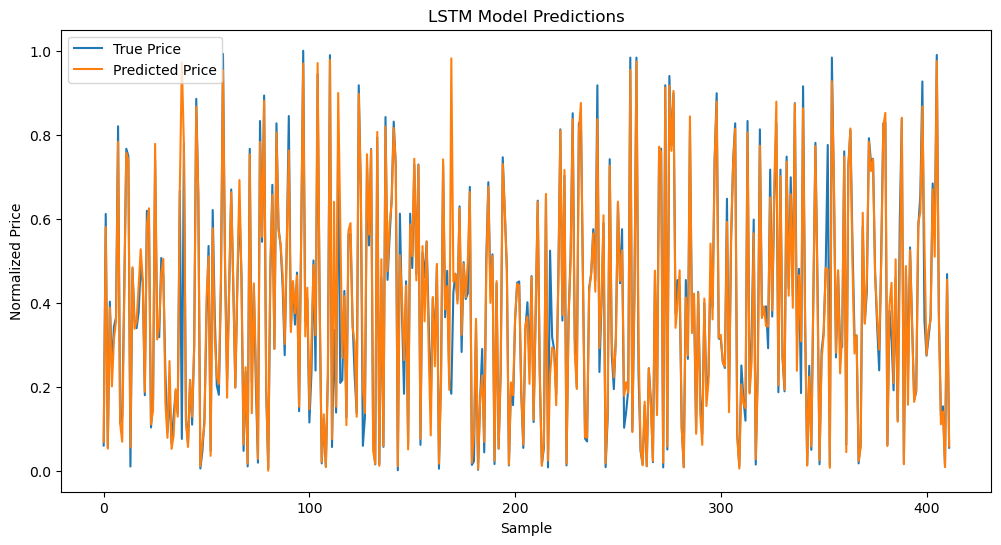

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('LSTM Model Predictions')
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


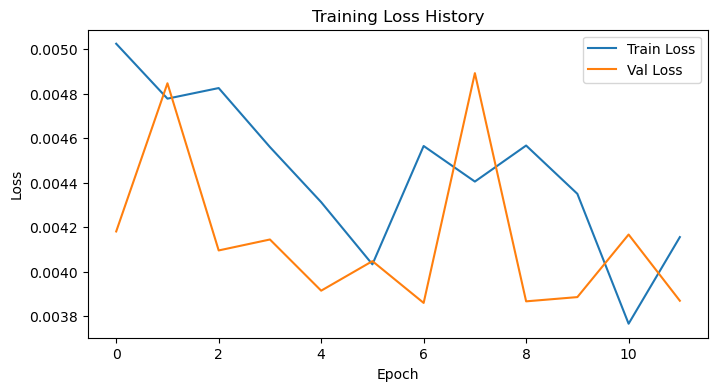

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# CNN LSTM Hybrid

In [84]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_combined.shape[1], X_combined.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_cnn_lstm.summary()

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, shuffle=True
)
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_cnn = model_cnn_lstm.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop_cnn])


/opt/homebrew/Caskroom/miniconda/base/envs/py39/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,499 (91.79 KB)

 Trainable params: 23,499 (91.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0993 - val_loss: 0.0100
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132 - val_loss: 0.0084
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 - val_loss: 0.0062
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 - val_loss: 0.0075
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_lo

In [87]:
# After training model_cnn_lstm, make predictions
y_pred_cnn = model_cnn_lstm.predict(X_test_cnn)

# Compute metrics for the CNN-LSTM model
mse_cnn = mean_squared_error(y_test_cnn, y_pred_cnn)
mae_cnn = mean_absolute_error(y_test_cnn, y_pred_cnn)
r2_cnn = r2_score(y_test_cnn, y_pred_cnn)

print("CNN-LSTM Hybrid Model Metrics:")
print("MSE: {:.4f}".format(mse_cnn))
print("MAE: {:.4f}".format(mae_cnn))
print("R^2: {:.4f}".format(r2_cnn))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
CNN-LSTM Hybrid Model Metrics:
MSE: 0.0055
MAE: 0.0312
R^2: 0.9203


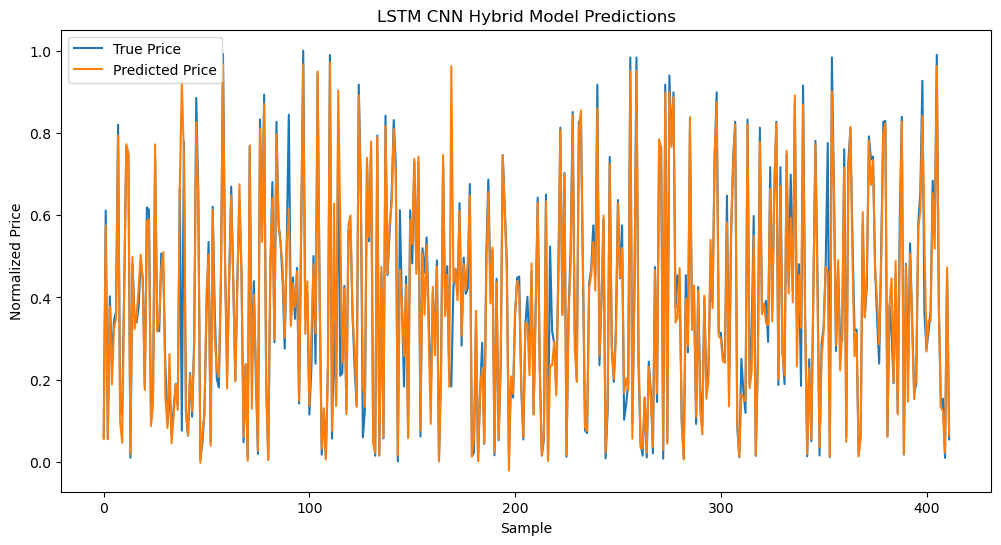

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Price')
plt.plot(y_pred_cnn, label='Predicted Price')
plt.title('LSTM CNN Hybrid Model Predictions')
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


In [91]:
# plt.figure(figsize=(8, 4))
# plt.plot(model_cnn_lstm.history['loss'], label='Train Loss')
# plt.plot(model_cnn_lstm.history['val_loss'], label='Val Loss')
# plt.title('Training Loss History')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()